In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6176,0475-RIJEP,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,77.85,3365.85,Yes
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
4109,0746-JTRFU,Male,0,No,No,2,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.05,56.35,Yes
5916,5183-KLYEM,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),112.75,8192.6,No
1635,2988-PLAHS,Female,0,No,No,3,Yes,No,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,69.95,220.45,No


In [97]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [98]:
df.drop('customerID',axis='columns',inplace=True)

In [99]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [100]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [101]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [102]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [103]:
df.shape

(7043, 20)

In [104]:
df.iloc[488].TotalCharges

' '

In [105]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [106]:
df1=df[df.TotalCharges!=' ']

In [107]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [108]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [109]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

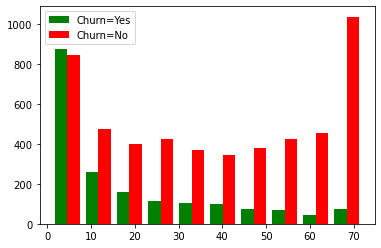

In [110]:
tenure_churn_no=df1[df1.Churn=="No"].tenure
tenure_churn_yes=df1[df1.Churn=="Yes"].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

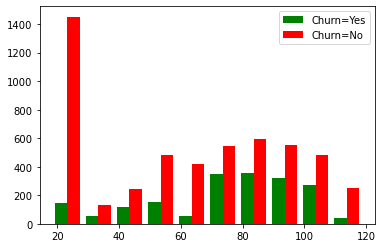

In [111]:
tenure_churn_no=df1[df1.Churn=="No"].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [112]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [113]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [114]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [115]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [116]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [117]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [118]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [119]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [120]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [121]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


# onehotencoding

In [122]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [123]:
df1.sample(2,random_state=43)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3940,0,0,0,0,19,0,0,DSL,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),25.15,468.35,0
3346,1,1,0,0,2,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,84.05,186.05,0


In [124]:
pd.get_dummies(data=df1,columns=['InternetService']).sample(2,random_state=43)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
3940,0,0,0,0,19,0,0,0,0,0,...,0,Month-to-month,1,Bank transfer (automatic),25.15,468.35,0,1,0,0
3346,1,1,0,0,2,1,1,0,0,0,...,1,Month-to-month,1,Electronic check,84.05,186.05,0,0,1,0


In [125]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# MinMaxScaler

In [126]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [127]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [128]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# train test split

In [133]:
X=df2.drop('Churn',axis='columns')
y=df2.Churn.astype(np.float32)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=15,stratify=y)

In [134]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [136]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [137]:
5163/1869

2.7624398073836276

# Build a model (Artificial Neural Network) in tensorflow/keras

In [140]:
from tensorflow_addons import losses

In [141]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
              Actual
        
Prediction   TP      FP
             FN      TN 

In [ ]:
Accuracy = (TN + TP)/(TN+TP+FN+FP) = (Number of correct assessments)/(Number of all assessments)
Precision = TP/TP+FP
Recall = TP/TP+FN
F1 Score [Harmonic Mean] = 2 Precision*Recall/Precision+Recall
Sensitivity [FP - Type I] = TP/(TP + FN) = (Number of true negative assessment)/(Number of all negative assessment)
Specificity [FN - Type II] = TN/(TN + FP) = (Number of true positive assessment)/(Number of all positive assessment)

In [144]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')    
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_trian,y_train,epochs=100,class_weights=weights)
    print(model.evaluate(X_test,y_test))
    
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)
    
    print('Classification Report: \n', classification_report(y_test,y_preds))
    return y_preds